In [ ]:
"""
비지도 학습이란?
비지도 학습은 기계 학습의 일종으로, 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주에 속한다. 이방법은 지도학습 혹은 
강화학습과 달리 입력값에 대한 목표치가 주어지지 않는다.

차원축소: PCA, LDA, SVD
군집화: KMeans Clustering, DBSCAN
군집화 평가
"""

In [ ]:
"""
차원축소

1. feature의 갯수를 줄이는 것을 뛰어 넘어, 특징을 추출하는 역할을 하기도 함.
2. 계산비용을 감소하는 효과
3. 전반적인 데이터에 대한 이해도를 높이는 효과"""

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd

In [2]:
iris = datasets.load_iris()
data = iris['data']
df = pd.DataFrame(data, columns = iris['feature_names'])
df['target'] = iris['target']

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# PCA 차원축소

"""
주성분 분석(PCA) 는 선형 차원 축소 기법. 
매우 인기있게 사용되는차원 축소 기법중 하나
주요 특징중 하나는 분산을 최대한 보존 함
- components 에 1보다 작은 값을 넣으면, 분산을 기준으로 차원 축소
- components 에 1보다 큰값을 넣으면, 해당 값을 기준으로 feature를 축소
"""

In [4]:
pca = PCA(n_components=2)

In [8]:
data_scaled = StandardScaler().fit_transform(df.loc[:,'sepal length (cm)':'petal width (cm)'])

In [10]:
pca_data = pca.fit_transform(data_scaled)

In [14]:
#원래 컬럼 4개에서
data_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [11]:
#컬럼 2개로 압축
pca_data[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

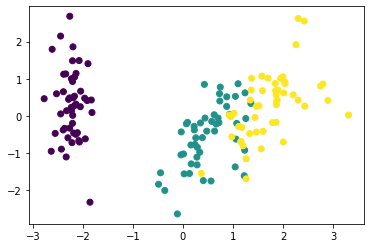

In [16]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=df['target'])

In [19]:
pca = PCA(n_components=0.99)

In [21]:
pca_data = pca.fit_transform(data_scaled)
pca_data[:5] #컬럼이 3개 분산은 0.99로 유지

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ]])

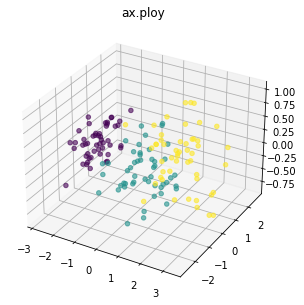

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection = '3d') 

sample_size = 50
ax.scatter(pca_data[:,0],pca_data[:,1], pca_data[:,2],alpha = 0.6,c=df['target'])
plt.title("ax.ploy")
plt.show()

In [ ]:
#lda 차원축수

"""
Linear Discriminant Analysis: 선형 판별 분석법(PCA와 유사)
- LDA는 클래스분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 내부 분산의 비율을 최대화하는 방식으로 차원 축소함
"""

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [26]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [31]:
data_scaled = StandardScaler().fit_transform(df.loc[:,'sepal length (cm)':'petal width (cm)'])

In [32]:
lda_data = lda.fit_transform(data_scaled, df['target'])

In [33]:
lda_data[:5]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449],
       [ 6.81320057, -0.67063107],
       [ 8.13230933,  0.51446253]])

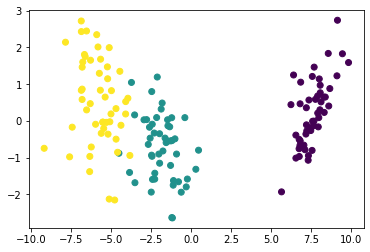

In [34]:
plt.scatter(lda_data[:,0],lda_data[:,1],c=df['target'])

In [ ]:
#SVD

"""
상품의 추천 시스템에도 활용되어지는 알고리즘(추천시스템)
특이값 분해 기법
PCA와 유사한 차원 축소 기법
scikit-learn 패키지에서는 truncated SVD(aka LSA)을 사용함
"""

In [36]:
from sklearn.decomposition import TruncatedSVD

In [39]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
svd = TruncatedSVD(n_components=2)

In [45]:
data_scaled = StandardScaler().fit_transform(df.loc[:,'sepal length (cm)':'petal width (cm)'])

In [46]:
svd_data = svd.fit_transform(data_scaled)

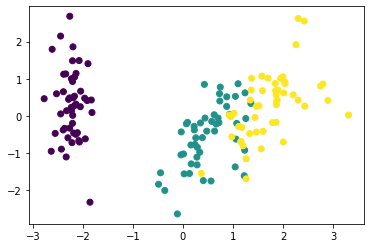

In [47]:
plt.scatter(svd_data[:,0],svd_data[:,1],c=df['target'])